In [ ]:
"""
Import useful modules
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

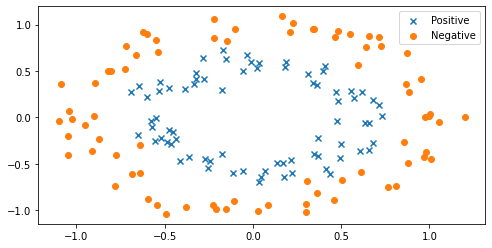

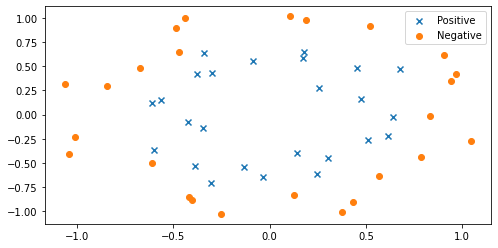

In [ ]:
"""
Generate and visualize given training and validation set, respectively.
"""
train_input, train_label = make_circles(n_samples = 150, factor = 0.6, noise = 0.1, random_state = 5)
train_data = pd.DataFrame(train_input, columns = ['X', 'Y'])
train_data['label'] = np.array(train_label)

valid_input, valid_label = make_circles(n_samples = 50, factor = 0.6, noise = 0.1, random_state = 8)
valid_data = pd.DataFrame(valid_input, columns = ['X', 'Y'])
valid_data['label'] = np.array(valid_label)


plt.figure(figsize = (8, 4))
positive = train_data[train_data['label'].isin([1])]
negative = train_data[train_data['label'].isin([0])]
plt.scatter(positive['X'], positive['Y'], marker = 'x', label = 'Positive')
plt.scatter(negative['X'], negative['Y'], marker = 'o', label = 'Negative')
plt.legend()

plt.figure(figsize = (8, 4))
positive1 = valid_data[valid_data['label'].isin([1])]
negative1 = valid_data[valid_data['label'].isin([0])]
plt.scatter(positive1['X'], positive1['Y'], marker = 'x', label = 'Positive')
plt.scatter(negative1['X'], negative1['Y'], marker = 'o', label = 'Negative')
plt.legend()

plt.show()

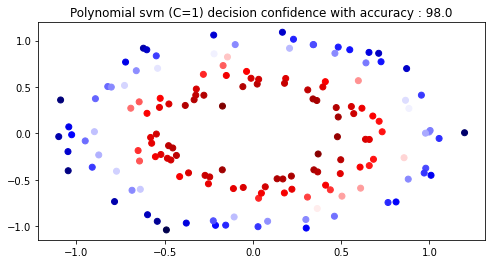

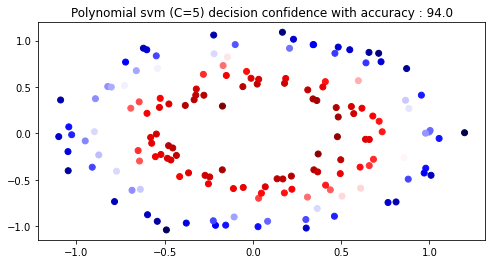

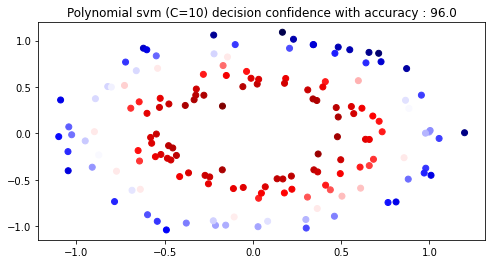

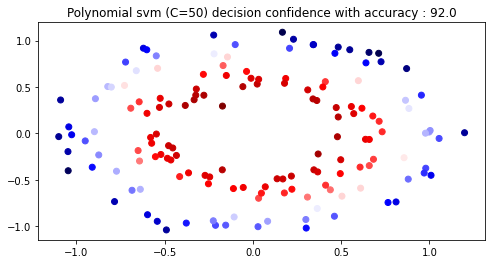

In [109]:
"""
For each hyperparameter, fit training data, and calculate accuracy of validation data using polynomial of degree 3. Then, visualize data.
"""
hyperparameter = [1, 5, 10, 50]
for i in hyperparameter:
  polynomial_svm = Pipeline([("poly_features", PolynomialFeatures(degree = 3)), ('svm_clf', svm.LinearSVC(C = i, loss = 'hinge', max_iter=10000))])
  
  polynomial_svm.fit(train_data[['X', 'Y']], train_data['label'])

  train_data['polynomial svm confidence'] = polynomial_svm.decision_function(train_data[['X', 'Y']])
  score = polynomial_svm.score(valid_data[['X', 'Y']], valid_data['label'])


  polynomial_svm.predict(np.c_[valid_data['X'].ravel(), valid_data['Y'].ravel()])

  plt.figure(figsize = (8, 4))
  plt.scatter(train_data['X'], train_data['Y'], c = train_data['polynomial svm confidence'], cmap = 'seismic')
  plt.title('Polynomial svm ' + '(C=' + str(i) + ') ' + 'decision confidence with accuracy : '+ str(score*100))
  plt.show()

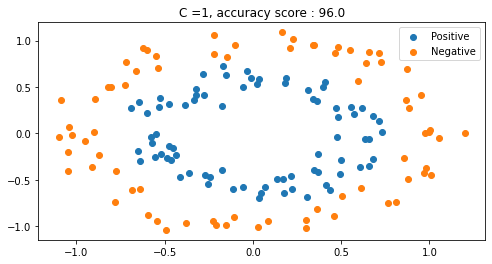

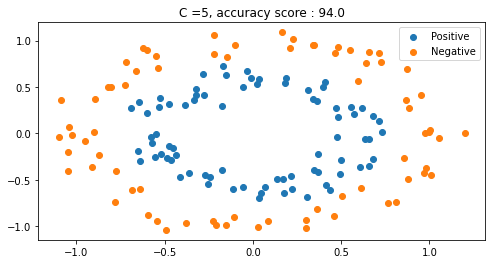

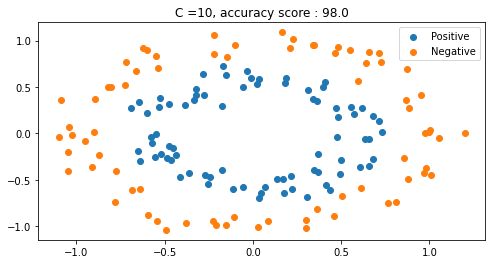

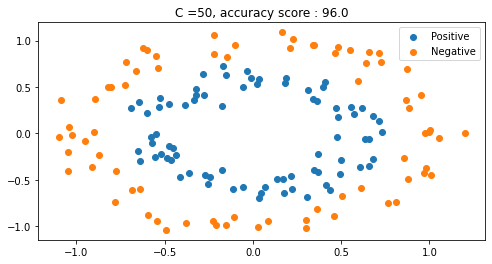

In [110]:
"""
For each hyperparameter, fit training data, and calculate accuracy of validation data using given RBF kernel function. Then, visualize data.
"""

for i in hyperparameter:
  rbf_svm = SVC(kernel = 'rbf', coef0 = 1, gamma = 1, C = i)
  rbf_svm.fit(train_data[['X', 'Y']], train_data['label'])

  train_data['rbf svm confidence'] = rbf_svm.predict(train_data[['X', 'Y']])
  score = rbf_svm.score(valid_data[['X', 'Y']], valid_data['label'])

  
  rbf_svm.predict(np.c_[valid_data['X'].ravel(), valid_data['Y'].ravel()])

  zero = np.where(train_data['rbf svm confidence'] == 0)
  one = np.where(train_data['rbf svm confidence'] == 1)
  plt.figure(figsize = (8, 4))
  plt.scatter(np.array(train_data['X'])[one], np.array(train_data['Y'])[one], label = 'Positive')
  plt.scatter(np.array(train_data['X'])[zero], np.array(train_data['Y'])[zero], label = 'Negative')
  plt.legend()
  plt.title('C =' + str(i) + ', ' + 'accuracy score : ' + str(score*100))